# 多尺度目标检测



In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

img = d2l.plt.imread('../img/catdog.jpg')#读入图片
h, w = img.shape[:2]
h, w

(561, 728)

在特征图（`fmap`）上生成锚框（`anchors`），每个单位（像素）作为锚框的中心

In [4]:
def display_anchors(fmap_w, fmap_h, s):
    d2l.set_figsize()
    fmap = torch.zeros((1, 10, fmap_h, fmap_w))#四维，前两个维度不影响输出，主要关心高和宽
    anchors = d2l.multibox_prior(fmap, sizes=s, ratios=[1, 2, 0.5])#给定fmap，size,高宽比
    bbox_scale = torch.tensor((w, h, w, h))#给定图片的高宽
    d2l.show_bboxes(d2l.plt.imshow(img).axes,
                    anchors[0] * bbox_scale)#显示锚框

探测小目标

E:\ProgramData\Anaconda3\envs\d2l_zh\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


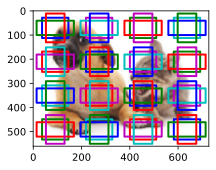

In [5]:
display_anchors(fmap_w=4, fmap_h=4, s=[0.15])

将特征图的高度和宽度减小一半，然后使用较大的锚框来检测较大的目标

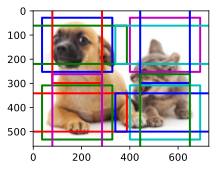

In [6]:
display_anchors(fmap_w=2, fmap_h=2, s=[0.4])

将特征图的高度和宽度减小一半，然后将锚框的尺度增加到0.8

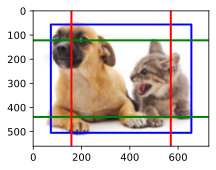

In [7]:
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])